Steps for project:
1. figure out area of analysis (northern rockies - how is this defined exactly), thinking just a boundary of montana
3. create a shapefile with a polygon of the extent
4. get fire data downloaded
5. get enso cycles downloaded
6. do analysis to calculate the total burned area for each year
7. correct for time??
8. stat analysis?
9. plot a graph of year vs ONI that also has year vs area burned on it
10. fit a linear regression of ONI vs area burned

In [37]:
# Import packages
import geopandas as gpd
import rasterio as rio
import matplotlib
import fiona
import pandas as pd
import rioxarray as rxr

In [6]:
# !conda install -y rioxarray

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mount\miniconda3\envs\491project

  added / updated specs:
    - rioxarray


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |  py311haa95532_0         162 KB
    rioxarray-0.15.3           |     pyhd8ed1ab_0          50 KB  conda-forge
    xarray-2023.6.0            |  py311haa95532_0         2.3 MB
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  rioxarray          conda-forge/noarch::rioxarray-0.15.3-pyhd8ed1ab_0 
  xarray             pkgs/main/win-64::xarray-2023.6.0-py311haa95532_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-

EPSG:6514


<Axes: >

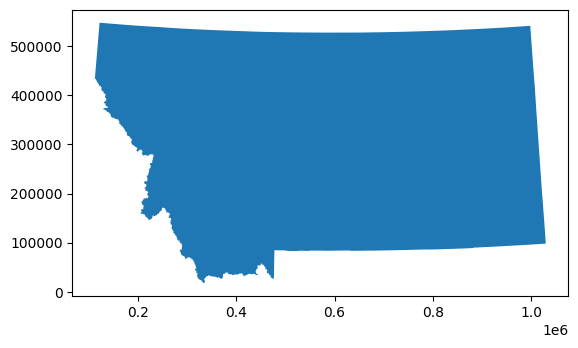

In [3]:
# Load montana shapefile
mt_outline = gpd.read_file('../../Data/mt_shapefile')
print(mt_outline.crs)
mt_outline.plot()

<Axes: >

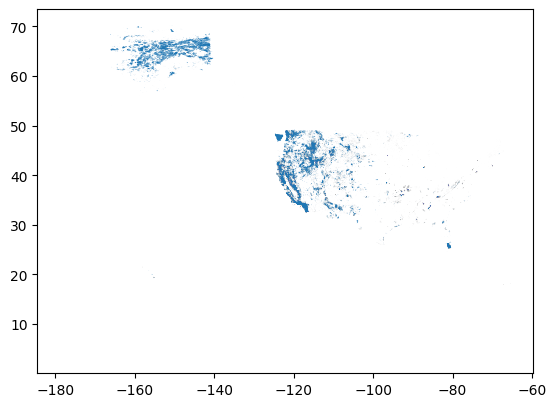

In [4]:
# Load fire polygons, may take a while to load
fire_all = gpd.read_file('../../Data/SHP/')
fire_all.plot()

<Axes: >

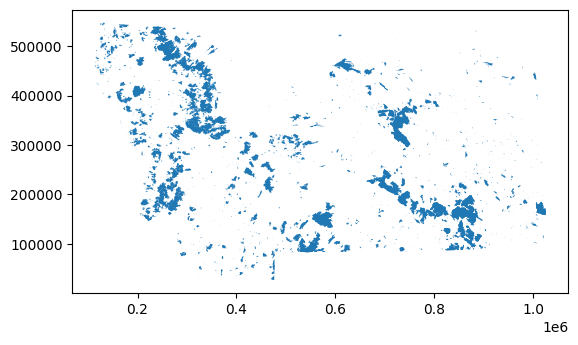

In [10]:
# clip fire polygons to mt
fire_all = fire_all.to_crs('EPSG:6514')
fire_mt = fire_all.clip(mt_outline.geometry)
fire_mt.plot()

In [14]:
# save the clipped fire polygons to a shapefile
# fire_mt.to_file('../../Data/MT_fire_SHP/clipped_shapefile.shp')

<Axes: >

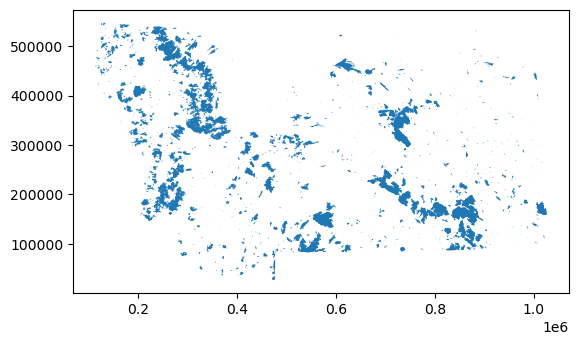

In [9]:
# read the saved shapefile rather than having to re run all of the previous code
fire_mt = gpd.read_file('../../Data/MT_fire_SHP//')
fire_mt.plot()

In [44]:
#create dataframe of the year and total acres burned within montana
table = fire_mt.groupby('FIRE_YEAR')['GIS_ACRES'].sum().reset_index()

#change year from string to number
table['FIRE_YEAR'] = table['FIRE_YEAR'].astype('float64')

#filter out bad data
firetable = table[table['FIRE_YEAR'] != 9999]
firetable = firetable[firetable['FIRE_YEAR'] > 1976]
firetable

,FIRE_YEAR,GIS_ACRES
46,1977.0,6.245481e+01
47,1978.0,8.422123e+02
48,1979.0,4.398650e+02
49,1980.0,3.249464e+03
50,1981.0,5.112134e+03
51,1982.0,9.806478e+03
52,1983.0,6.757798e+02
53,1984.0,4.465364e+04
54,1985.0,7.004646e+04
55,1986.0,2.369844e+03


In [42]:
# read in ENSO data as a dataframe
ENSO = pd.read_csv('../../Data/ENSO.csv')
ENSO

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
0,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
2,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
3,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
4,1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0
